In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
!pip install google_images_download

     |████████████████████████████████| 911kB 4.6MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=2aab6c71e9caf0ca01591cee26ccca326f55f971886d2f3315b7aea0dfbd583f
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
from google_images_download import google_images_download

In [6]:
!pip install pandas

In [7]:
response = google_images_download.googleimagesdownload()

arguments = {'keywords':'Venusaur,Ivysaur,Bulbasaur','limit':100,'print_urls':False}

paths = response.download(arguments)

print(paths)


Item no.: 1 --> Item name = Venusaur
Evaluating...
Starting Download...
Completed Image ====> 1.003.png
Completed Image ====> 2.venusaur-mega.jpg
Completed Image ====> 3.003-01.png
Invalid or missing image format. Skipping...
Completed Image ====> 4.D5sBQ46W0AA68OG.png
Completed Image ====> 5.8003-Mega-Venusaur.png
Completed Image ====> 6.250px-Kukui_Venusaur.png
Completed Image ====> 7.Venusaur-Pokemon-Go.png
Completed Image ====> 8.EHCkGLrX4AEVlIr.jpg
Completed Image ====> 9.pok-mon-firered-and-leafgreen-venusaur-pok-mon-go-ivysaur-png-favpng-UQZ1Y8m5j01v3yX2kQUAdMVbA.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 10.75bf33810f6f116c50750f7b16878db4.png
Completed Image ====> 11.13807733.png
Invalid or missing image format. Skipping...
Completed Image ====> 12.crswc6ckobto6l8hmxrf.png
Completed Image ====> 13.imgbin-venusaur-pok-mon-go-ivysaur-pok-dex-pokemon-go-4pMkGrruyugVz0bvRzmrQRH0X.jpg
Completed Image ====> 14.il_570xN.1708353729_rpsq.jpg
Completed Image

In [0]:
from fastai.vision import *

In [9]:
doc(verify_images)

In [10]:
classes = ['Bulbasaur', 'Ivysaur', 'Venusaur']

path = Path('/content/downloads')

for c in classes:
  print(c)
  verify_images(path/c, delete = True, max_size=500)

Bulbasaur


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Ivysaur


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:1044: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Venusaur


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [11]:
doc(ImageDataBunch)

In [0]:
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.3, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [13]:
data.classes

['Bulbasaur', 'Ivysaur', 'Venusaur']

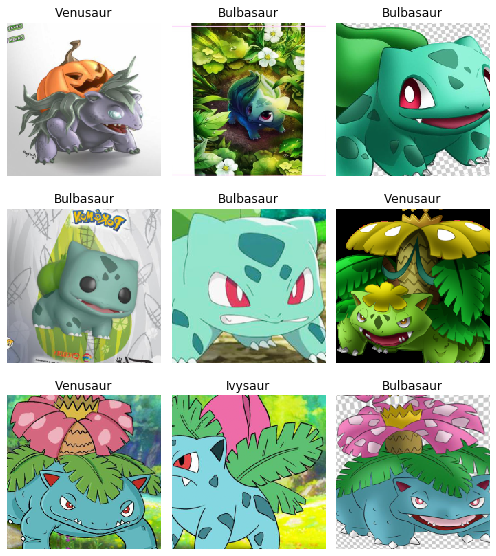

In [14]:
data.show_batch(rows=3, figsize=(7,8))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Bulbasaur', 'Ivysaur', 'Venusaur'], 3, 194, 82)

**Training Model**

In [16]:
learn = cnn_learner( data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:09<00:00, 9.46MB/s]


In [17]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.729645,1.710795,0.560976,00:05
1,1.371096,0.973545,0.268293,00:04
2,1.118143,0.781085,0.219512,00:04
3,0.960860,0.735592,0.182927,00:04


In [0]:
learn.save('pokemon-model-1')

In [20]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.261569,0.696939,0.182927,00:04
1,0.282623,0.696664,0.207317,00:04
2,0.283293,0.644325,0.207317,00:04
3,0.266951,0.633207,0.195122,00:04
4,0.269809,0.633413,0.182927,00:04
5,0.264146,0.624807,0.219512,00:05
6,0.248825,0.626229,0.219512,00:05
7,0.234572,0.618532,0.219512,00:04


In [0]:
learn.save('pokemon-model-2')

**Results**

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

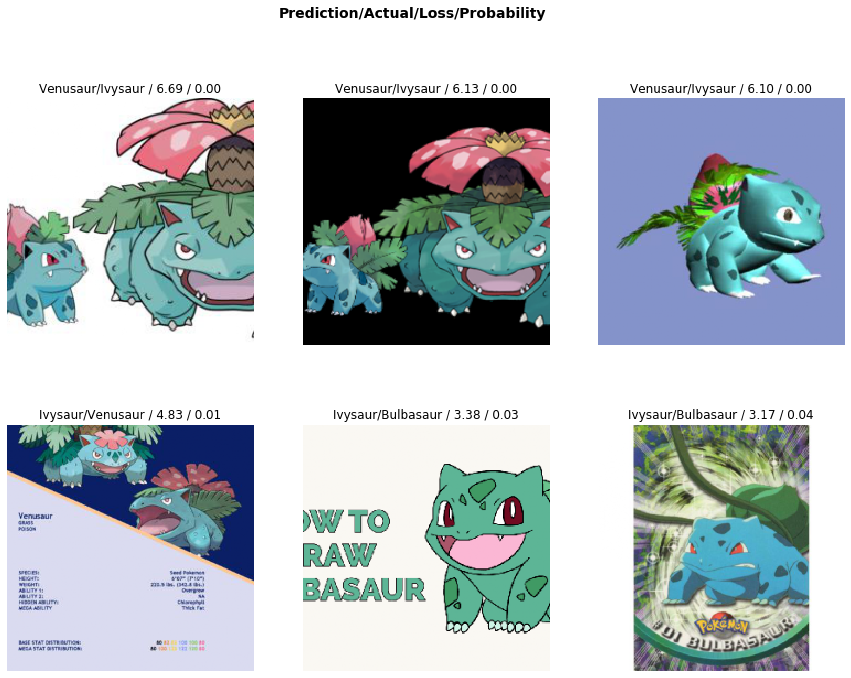

In [23]:
interp.plot_top_losses(6,figsize=(15,11))

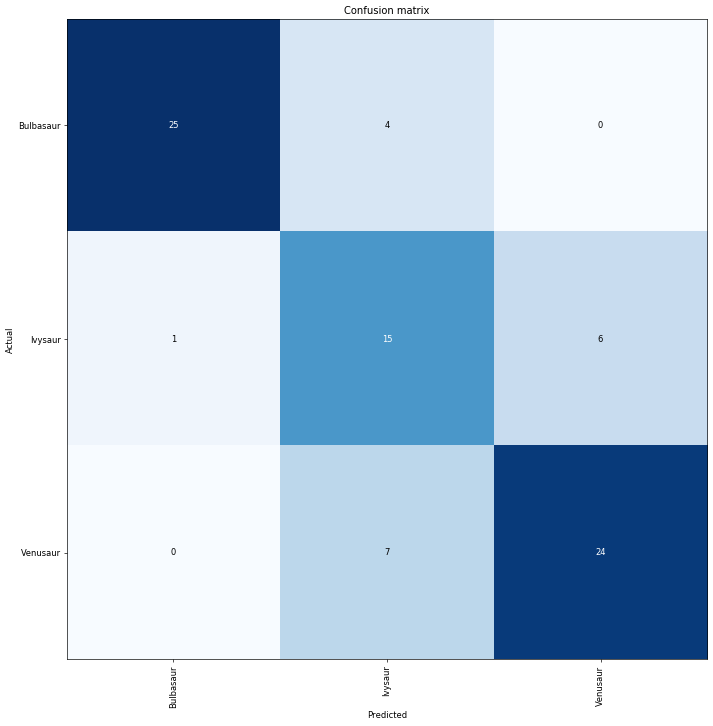

In [24]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [25]:
interp.most_confused(min_val=4)

[('Venusaur', 'Ivysaur', 7),
 ('Ivysaur', 'Venusaur', 6),
 ('Bulbasaur', 'Ivysaur', 4)]

**Unfreezing wieghts of the original model, Fine tuning and learning rates**

In [0]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.203731,1.110897,0.207317,00:05


In [28]:
learn.load('pokemon-model-2')

Learner(data=ImageDataBunch;

Train: LabelList (194 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bulbasaur,Bulbasaur,Bulbasaur,Bulbasaur,Bulbasaur
Path: /content/downloads;

Valid: LabelList (82 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bulbasaur,Bulbasaur,Ivysaur,Bulbasaur,Ivysaur
Path: /content/downloads;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64,

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


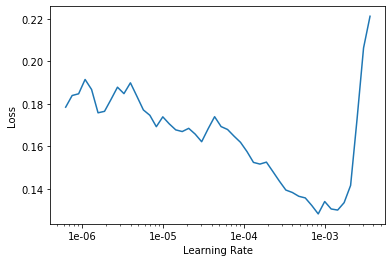

In [30]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [32]:
learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.198834,0.959182,0.231707,00:05
1,0.189941,0.892229,0.219512,00:05
2,0.219102,1.192161,0.268293,00:05
3,0.184249,1.027479,0.219512,00:05


Error Rate is **16.21 %** previously it was **21.6 %**

**RESNET50**

In [0]:
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.3, ds_tfms=get_transforms(), size=224, num_workers=4, bs=64//2).normalize(imagenet_stats)

In [36]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 45.1MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


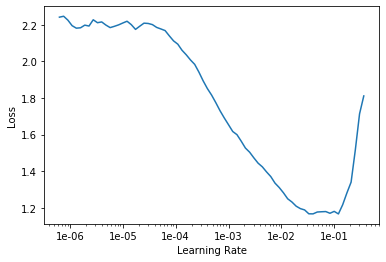

In [37]:
learn.lr_find()
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.408123,1.220020,0.329268,00:05
1,0.370715,1.272344,0.268293,00:05
2,0.297036,1.162260,0.268293,00:05
3,0.238973,1.261073,0.341463,00:05
4,0.224098,1.260733,0.341463,00:05
5,0.223176,1.182931,0.341463,00:05
6,0.235462,1.146063,0.329268,00:05
7,0.251010,1.120815,0.329268,00:05


In [0]:
learn.unfreeze()

In [44]:
learn.fit_one_cycle(8, max_lr=slice(1e-6, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,8.207233,3.874753,0.426829,00:05
1,11.674835,4.841563,0.439024,00:05
2,11.376867,5.692775,0.475610,00:05
3,10.531215,4.253939,0.426829,00:05
4,10.190744,3.913414,0.451219,00:05
5,11.055346,3.823401,0.439024,00:05
6,10.679860,3.892607,0.426829,00:05
7,10.394152,3.844831,0.414634,00:05


Error rate is **41.4 %**